In [2]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import warnings

warnings.filterwarnings('ignore')

In [5]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [9]:
cancer['data'][1]

array([2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
       8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
       3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
       1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
       1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02])

In [10]:
cancer.data.shape

(569, 30)

In [11]:
print(
    cancer.feature_names
)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [12]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [15]:
cancer.target[50]

1

In [16]:
X = cancer.data
y = cancer.target

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
X_train.shape

(426, 30)

In [19]:
X_test.shape

(143, 30)

<Axes: ylabel='count'>

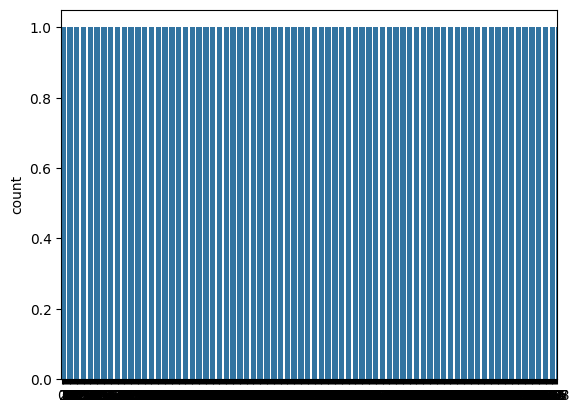

In [24]:
sns.countplot(
    y
)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [27]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
y_pred = knn.predict(X_test)

In [29]:
knn.score(X_train, y_train)

0.9342723004694836

In [30]:
knn.score(X_test, y_test)

0.965034965034965

In [31]:
#

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(
    classification_report(y_test, y_pred)
)

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        54
           1       0.96      0.99      0.97        89

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



<Axes: >

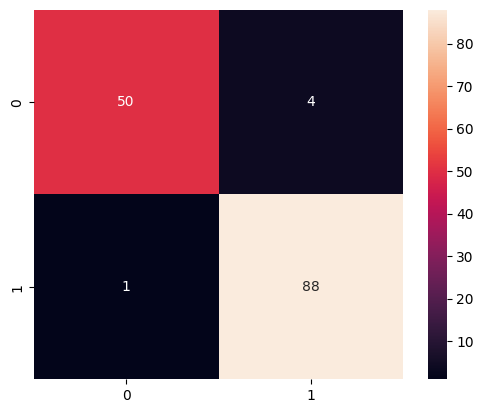

In [33]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(
    cm, square=True, annot=True
)

In [35]:
error_rate = []

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


In [36]:
error_rate

[0.06993006993006994,
 0.07692307692307693,
 0.06993006993006994,
 0.055944055944055944,
 0.03496503496503497,
 0.04895104895104895,
 0.04195804195804196,
 0.04195804195804196,
 0.04195804195804196,
 0.027972027972027972,
 0.02097902097902098,
 0.02097902097902098,
 0.027972027972027972,
 0.027972027972027972,
 0.03496503496503497,
 0.03496503496503497,
 0.03496503496503497,
 0.027972027972027972,
 0.03496503496503497]

In [38]:
pred_i != y_test

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [39]:
np.mean( 
    pred_i != y_test
 )

0.03496503496503497

Text(0, 0.5, 'error rate')

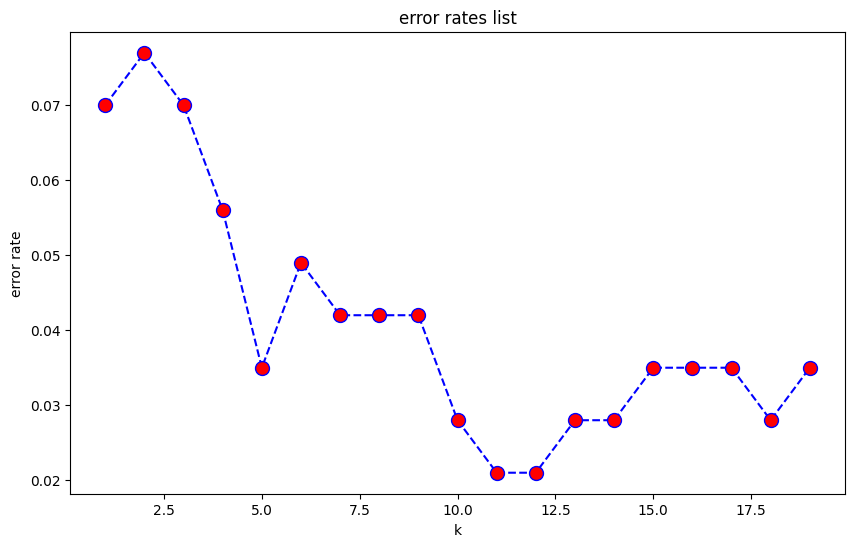

In [45]:
plt.figure(figsize=(10,6))

plt.plot(
    range(1,20),
    error_rate,
    
    color='blue',
    linestyle='dashed',
    marker='o',
    markerfacecolor='red',
    markersize=10,
)

plt.title('error rates list')
plt.xlabel('k')
plt.ylabel('error rate')

In [46]:
knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(X_test, y_test)
y_pred = knn.predict(X_train)

In [47]:
knn.score(X_test, y_test)

0.951048951048951

In [50]:
knn.score(X_train, y_train)

0.9061032863849765